# Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
# Import Librarys
import pandas as pd
import numpy as np

In [2]:
# Load the dataset and explore the variables.

In [3]:
# Read csv file files_for_lab/customer_churn.csv/ we were supposed to store the file in the subfolder files_for_lab
# Therefore only read the file name

customer = pd.read_csv("customer_churn.csv")
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
customer.shape

(7043, 21)

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Search for Null values
# No Null values in the dataframe customer
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Checking for data types, mostly object, therefore mostly categorial features. 
customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Our target Value Churn is a categorial value (data type object)

In [9]:
# Check the numerical features for unique values

In [10]:
customer['SeniorCitizen'].value_counts(dropna=False)
# Only two unique values, therefore SeniorCitizen is a categorial value and has to be changed to data type object
# customer is not a numerical number, it is a categorial column expressed in numbers (different categories)
# Therefore we want to treat it as a categorical value and change the type to object

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
customer['SeniorCitizen'] = customer['SeniorCitizen'].astype('object') # This will be treated as categorical


In [12]:
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
type("SeniorCitizen")

str

In [14]:
customer.SeniorCitizen.dtype

dtype('O')

In [15]:
customer.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# the index shows me excatly, where they start and end to see empty strings and spaces which would have to be replaced 
# by a new category e.g "Unknown"
customer['SeniorCitizen'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [17]:
customer['tenure'].value_counts(dropna=False)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [18]:
customer['tenure'].value_counts().index

Int64Index([ 1, 72,  2,  3,  4, 71,  5,  7,  8, 70,  9, 12, 10,  6, 13, 68, 11,
            15, 67, 18, 69, 24, 22, 66, 35, 17, 23, 16, 64, 56, 52, 26, 25, 61,
            14, 65, 60, 46, 19, 29, 27, 30, 63, 20, 53, 62, 41, 32, 50, 47, 51,
            54, 58, 49, 57, 31, 43, 37, 42, 34, 33, 55, 48, 40, 21, 45, 59, 38,
            28, 39, 44, 36,  0],
           dtype='int64')

In [19]:
customer['MonthlyCharges'].value_counts(dropna=False)

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [20]:
customer['MonthlyCharges'].value_counts().index
# Issue is I can only see head and tail

Float64Index([20.05, 19.85, 19.95,  19.9,  20.0,  19.7, 19.65, 19.55, 20.15,
              19.75,
              ...
              81.75, 58.65, 57.45, 35.35,  92.1, 23.65, 114.7, 43.65,  87.8,
               78.7],
             dtype='float64', length=1585)

In [21]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [22]:
# Explore values in columns TENURE and MonthlyCharges. 
# How many different cominations are there?

pd.crosstab(customer.SeniorCitizen, customer.MonthlyCharges)

MonthlyCharges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,117.35,117.45,117.50,117.60,117.80,118.20,118.35,118.60,118.65,118.75
SeniorCitizen,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,2,1,7,5,2,5,7,...,0,0,1,1,1,1,1,2,1,1
1,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [23]:
pd.crosstab(customer.tenure, customer.MonthlyCharges)

MonthlyCharges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,117.35,117.45,117.50,117.60,117.80,118.20,118.35,118.60,118.65,118.75
tenure,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
pd.crosstab(customer.SeniorCitizen, customer.tenure)

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
SeniorCitizen,,,,,,,,,,,,,,,,,,,,,
0,11,527,195,175,150,109,97,108,99,103,...,65,66,57,67,82,87,82,102,139,306
1,0,86,43,25,26,24,13,23,24,16,...,7,14,19,22,16,13,13,17,31,56


In [25]:
# Check the target Value Churn
customer['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [26]:
customer['Churn'].value_counts().index

Index(['No', 'Yes'], dtype='object')

In [27]:
# We will change the unique values YES and NO into 1 and 0 

Some algorithms, such as linear regression and logistic regression, are based on the assumption that the input variables are numerical. These algorithms typically cannot handle categorical variables directly. Therefore, it is necessary to convert categorical variables into numerical variables before using them with these algorithms. One common way to do this is through the use of dummy variables, where a new binary variable is created for each category of the original categorical variable, with a value of 1 indicating that the original variable falls into that category and a value of 0 indicating that it does not.

In [28]:
# Example from class 2.09

#def cleanDuration(x):
    #if x in [48, 60]:
        #return 'longer'
    #else:
        #return str(x)
#data['duration'] = list(map(cleanDuration, data['duration']))
#data.head(60)

In [29]:
def target_churn_ordinal(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
customer['Churn'] = list(map(target_churn_ordinal, customer['Churn']))
customer.head(60)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [30]:
# We will only include the mentioned Features and the target value in our Dataframe going forward.
# We can do this by dropping all the other feature, or by defining a new dataframe that only includes the mentioned ones.

In [31]:
# We have to use double brackets to create a dataframe
customer = customer[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
customer

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


In [32]:
# Checking for multicollinearity
# we use the heatmap (only for numerical values).

# We can not see the correlation between features and target, because the target is categorial (Churn) (status = Yes or No)
# Because heatmap shows only correlations for numerical values!
# The seperation of numerical and categorial is done automatically by the .corr function

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [34]:
# X/y split (Seperate features from target)
X = customer.drop('Churn',axis = 1)
y = customer['Churn']

In [35]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [36]:
type(y)

pandas.core.series.Series

In [37]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


C:\Users\49174\AppData\Local\Temp\ipykernel_18332\2461399831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = X.corr()


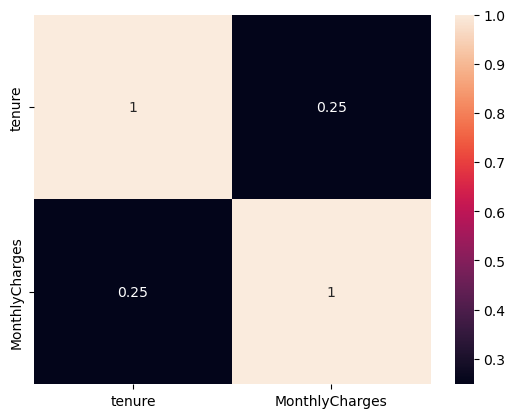

In [38]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [39]:
# The correlation is not higher than 0,9 so no need to drop one of the numerical vlaues.

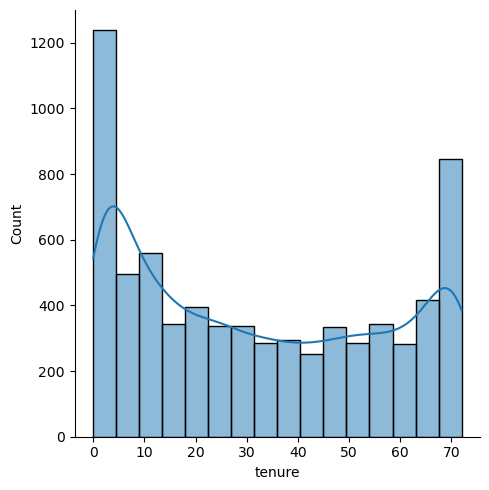

In [40]:
# look at the scale and distribution of values

sns.displot(customer['tenure'], kde=True)
plt.show()



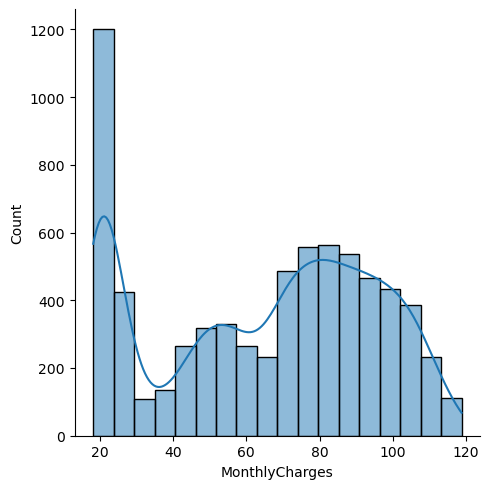

In [41]:
sns.displot(customer['MonthlyCharges'], kde=True)
plt.show()

<Axes: >

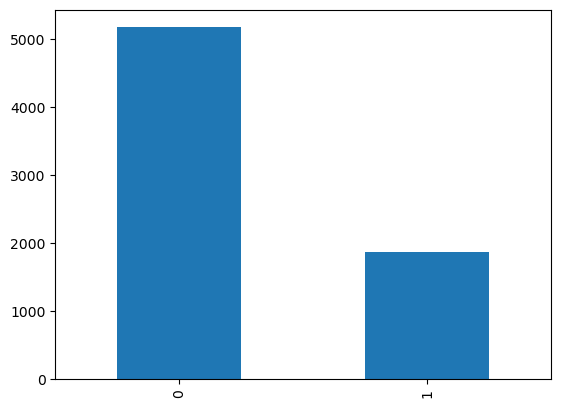

In [42]:
# There is imbalance in data, as expected for this exercise. No (0) is more than double as big as Yes (1)

count_classes = customer['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

4. Build the logistic regression model.

In [43]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

In [44]:
# split numericals and categoricals

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

C:\Users\49174\AppData\Local\Temp\ipykernel_18332\1304283826.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_num['tenure'])


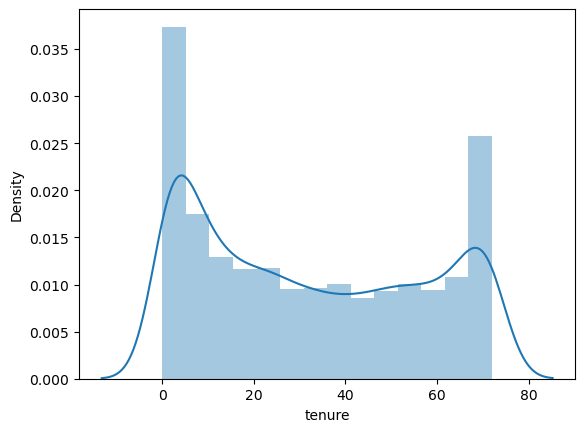

C:\Users\49174\AppData\Local\Temp\ipykernel_18332\1304283826.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_num['MonthlyCharges'])


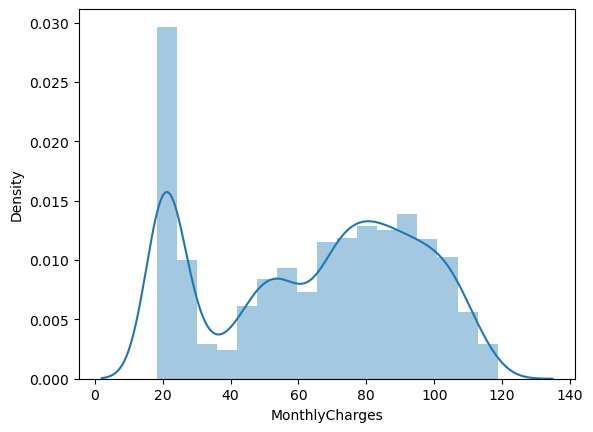

In [45]:
# plot distributions for numericals
sns.distplot(X_train_num['tenure'])
plt.show()

sns.distplot(X_train_num['MonthlyCharges'])
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Normalizing data
# we train the scaler on only the numerical training data
# we will reuse this transformer for acces later 
# x train scaled all values between 0 and 1

transformer = MinMaxScaler().fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled.head()

,tenure,MonthlyCharges
0,0.333333,0.309263
1,0.750000,0.468127
2,0.041667,0.218127
3,0.847222,0.019920
4,0.166667,0.659363


In [48]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int64

In [49]:
y_train = y_train.reset_index(drop=True)
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True)

# Reseting the index is only needed when dealing with an imbalanced dataset

In [50]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [51]:
# encode categoricals
# we fit it only on the training data x_cat
# we will reuse the encoder 

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
# Note: in version 1.0 and higher of sklearn this method is called 'get_feature_names_out()'
# we will reuse encoder and cols when encoding the X_test_cat
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()

,SeniorCitizen_1
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [52]:
# Combined Dataframe (numerical and categorical) for training data
X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)

In [53]:
X_train_treated 

,tenure,MonthlyCharges,SeniorCitizen_1
0,0.333333,0.309263,0.0
1,0.750000,0.468127,1.0
2,0.041667,0.218127,0.0
3,0.847222,0.019920,0.0
4,0.166667,0.659363,0.0
...,...,...,...
5277,0.208333,0.848606,0.0
5278,0.138889,0.725598,0.0
5279,0.805556,0.024900,0.0
5280,0.013889,0.512948,1.0


In [54]:
# Normalizing the Test data
# It is important to use the same methods which were used for the Train data to make sure the data is represented consistently

In [55]:
# apply scaler to X_test_num

# Since we want to simulate a real world szenario, where the data is unknown, we splitted the data into training and test data.
# Now it is important to not refit the scaler on the test data!
# If you refit a scaler on the test data, you introduce information from the test set into your training process,
# leaking information from your evaluation data into your model building process

In [56]:
# transformer = MinMaxScaler().fit(X_train_num) # Now refitting on the Test data!!!! Line has to be taken out
# Use the scaler on X_test_num, make sure you replace all values properly and rename everything to test...

X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head()


,tenure,MonthlyCharges
0,0.263889,0.397908
1,0.833333,0.979582
2,0.180556,0.534861
3,0.013889,0.021912
4,0.763889,0.592629


In [57]:
X_test_scaled.describe().T
# values a little bit higher or lower than zero for max min possible

,count,mean,std,min,25%,50%,75%,max
tenure,1761.0,0.450809,0.342667,0.000000,0.125000,0.402778,0.763889,1.000000
MonthlyCharges,1761.0,0.464650,0.303183,0.001494,0.167331,0.520418,0.717131,1.000996


In [58]:
# apply encoder to X_test_cat
# I apply the transofrmer created ealier, do not refit tranformer!!


In [59]:
# encoder = OneHotEncoder(drop='first').fit(X_train_cat) Dont refit the model on the test data!!!!!
encoded_cat_test = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
# Note: in version 1.0 and higher of sklearn this method is called 'get_feature_names_out()'
# we will reuse encoder and cols when encoding the X_test_cat
onehot_encoded_test = pd.DataFrame(encoded_cat_test, columns=cols)
onehot_encoded_test.head()

,SeniorCitizen_1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [60]:
# combine scaled and onehot_encoded portions of X_test
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

In [61]:
# Combined Dataframe (numerical and categorial) for test data
X_test_treated

,tenure,MonthlyCharges,SeniorCitizen_1
0,0.263889,0.397908,0.0
1,0.833333,0.979582,0.0
2,0.180556,0.534861,0.0
3,0.013889,0.021912,0.0
4,0.763889,0.592629,0.0
...,...,...,...
1756,0.986111,0.647908,0.0
1757,0.166667,0.011952,0.0
1758,0.666667,0.017430,0.0
1759,0.986111,0.683267,0.0


4. Build the logistic regression model.

In [62]:
# Index was already reset 
# Reseting the index is only needed when dealing with an imbalanced dataset (which is the case here as seen above)

y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_treated, y_train)

Make a prediction this counts the percentage of cases where we got the target value right/correctly

In [66]:
predictions = classification.predict(X_test_treated)
classification.score(X_test_treated, y_test)

0.78137421919364

In [67]:
predictions = classification.predict(X_test_treated)
predictions
classification.score(X_test_treated, y_test)

0.78137421919364

5. Evaluate the model.

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1165,  133],
       [ 252,  211]], dtype=int64)

In [ ]:
array = confusion_matrix(y_test, predictions)
print('             Predicted Labels')
print('             |   0    |     1')
print('---------------------------------')
print('True label 0 | ',array[0][0],'|   ', array[0][1])
print('---------------------------------')
print('           1 | ',array[1][0],' |   ', array[1][1])

In [ ]:
# 1165 times predicted 0 when it was 0    # 133 times predicted 1 when it was 0
# 252 times predicted 0 when it was 1     # 211 times predicted 1 when it was 1

In [81]:
Correct = 1165+211
Incorrect = 252+133
Accuracy = Correct/(Correct+Incorrect)
Accuracy

0.78137421919364

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [73]:
print('accuracy = ', accuracy_score(y_test, predictions))
print('precision = ', precision_score(y_test, predictions))
print('recall = ', recall_score(y_test, predictions))
print('f1 = ', f1_score(y_test, predictions))

accuracy =  0.78137421919364
precision =  0.6133720930232558
recall =  0.4557235421166307
f1 =  0.5229244114002479


6. Even a simple model will give us more than 70% accuracy. Why?

In [ ]:
# Imbalance plot of the target value y = 'Churn'

<Axes: >

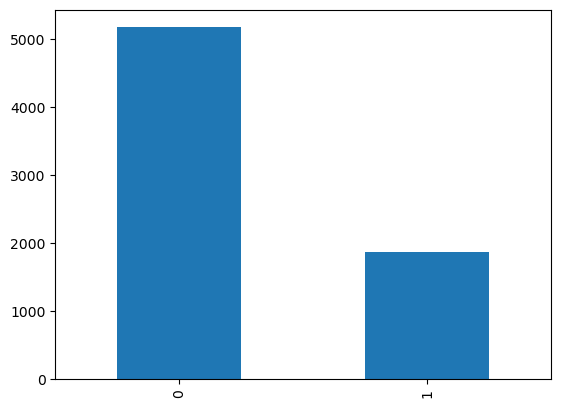

In [75]:
count_classes = customer['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [ ]:
# There is an imbalance in the data.
# 2,7 times the amount of No(0) than there are Yes(1)
# If I always guess yes, the probability for getting No(0) is very high

In [76]:
customer['Churn'].value_counts(dropna=False)

0    5174
1    1869
Name: Churn, dtype: int64

In [77]:
Imbalance = 5174/1869
Imbalance

2.7683253076511503

7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [ ]:
# Look at minority class and build new datapoints that are close to the existing datapoints
# It looks by default at the five nearest neighbours and builds an average point based on that
    # Difference to neighbours modell is, that it creates a new average point based on nearest neighbours

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
# SMOTE is like a transformer of the data
# it figueres out on its own the majority and minority class 
sm = SMOTE(random_state=100, k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_treated,y_train)

In [84]:
X_train_SMOTE.shape

(7752, 3)

In [85]:
X_train_treated.shape

(5282, 3)

In [86]:
classification_smote = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_SMOTE, y_train_SMOTE)



In [88]:
predictions_smote = classification_smote.predict(X_test_treated)
classification_smote.score(X_test_treated, y_test)

0.7194775695627484

In [91]:
# Before Smote
print('accuracy = ', accuracy_score(y_test, predictions))
print('precision = ', precision_score(y_test, predictions))
print('recall = ', recall_score(y_test, predictions))
print('f1 = ', f1_score(y_test, predictions))

accuracy =  0.78137421919364
precision =  0.6133720930232558
recall =  0.4557235421166307
f1 =  0.5229244114002479


In [92]:
# After Smote
print('accuracy = ', accuracy_score(y_test, predictions_smote))
print('precision = ', precision_score(y_test, predictions_smote))
print('recall = ', recall_score(y_test, predictions_smote))
print('f1 = ', f1_score(y_test, predictions_smote))

accuracy =  0.7194775695627484
precision =  0.4776978417266187
recall =  0.7170626349892009
f1 =  0.5734024179620035


In [ ]:
#Negative:
#Accuracy, total number of correct predictions, decreased after Smote. 
#Precision, how many of the positive predictions made by the model are actually correct, decreased after Smote. 

#Positive:
#Recall, minimize false negatives, improved. The model became better at identifying positive Cases.
#The F1 score, which balances precision and recall, also improved after SMOTE. 
    #There is a better trade-off between false positives and false negatives.
    
#SMOTE improved recall and the F1 score but at the cost of a decrease in accuracy and precision.
#Trade-off between different aspects of model performance
#Choice of using SMOTE depends on specific goals and problem to be solved by the model.



In [ ]:
# Possibility to Change the k_neighbors value from default 5 to another value and try if the results improve. 

In [90]:
confusion_matrix(y_test,predictions_smote)

array([[935, 363],
       [131, 332]], dtype=int64)

Notes

Accuracy:

Definition: Accuracy is a measure of how many of the total predictions made by a model are correct. It is calculated as the ratio of correct predictions to the total number of predictions.
Formula: (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
Interpretation: Accuracy tells you the overall correctness of your model's predictions.

Precision:

Definition: Precision is a measure of how many of the positive predictions made by the model are actually correct. It is calculated as the ratio of true positive predictions to the total positive predictions.
Formula: True Positives / (True Positives + False Positives)
Interpretation: Precision quantifies the accuracy of positive predictions. It is essential when you want to minimize false positives.

Recall:

Definition: Recall, also known as sensitivity or true positive rate, is a measure of how many of the actual positive cases were correctly predicted by the model. It is calculated as the ratio of true positive predictions to the total actual positives.
Formula: True Positives / (True Positives + False Negatives)
Interpretation: Recall is important when you want to minimize false negatives, as it assesses the model's ability to capture all relevant cases.

F1 Score:

Definition: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, which is especially useful when you need to consider both false positives and false negatives simultaneously.
Formula: 2 * (Precision * Recall) / (Precision + Recall)
Interpretation: The F1 score combines precision and recall into a single metric, making it useful when there is an imbalance between classes.